In [1]:
using Pkg
Pkg.activate("..")
#Pkg.develop(["Equilibrium", "IMAS"])
using Revise
using FUSE
using FUSE.IMAS

  Activating environment at `~/.julia/dev/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1317


In [22]:
ϵ = 0.32
κ = 1.7
δ = 0.33
R0 = 6.2
B0 = 5.3
ip = 15.E6
beta_n = 3.0

resolution = 33

dd=IMAS.dd()
FUSE.init(dd.equilibrium, 0.0; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=false)

eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium, 0.0, alpha=1, qstar=1.5)
@time FUSE.step(eqactor)
print(eqactor.S)
dd.equilibrium = FUSE.finalize(eqactor, resolution)

eqt = dd.equilibrium.time_slice[1];

  0.457935 seconds (5.82 M allocations: 321.871 MiB, 11.06% gc time, 0.66% compilation time)
SolovevEquilibrium
  B0 = 5.3 [T]
  R0 = 6.2 [m]
  ϵ  = 0.32
  δ  = 0.33
  κ  = 1.7
  α  = 0.0027856704762293967
  q⋆ = 1.5455268252174736
  βp = 0.9981278686893219
  βt = 0.04278908932692801
  σ  = 1
  diverted  = false
  xpoint  = nothing
  symmetric = true

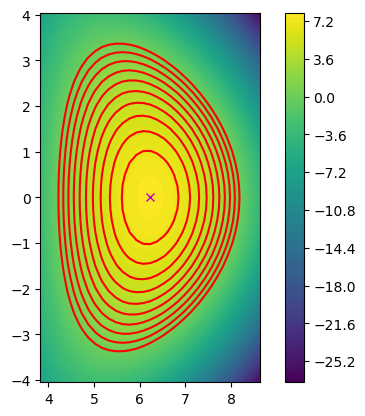

In [20]:
using PyPlot
Bp=sqrt.(eqt.profiles_2d[1].b_field_z.^2.0.+eqt.profiles_2d[1].b_field_r.^2.0)

PyPlot.figure()
CS=PyPlot.contour(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
    transpose(eqt.profiles_2d[1].psi),levels=sort(range(eqt.profiles_1d.psi[1],eqt.profiles_1d.psi[end],length=11)),colors="r")
CS=PyPlot.contourf(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
               transpose(eqt.profiles_2d[1].psi),levels=100)
#PyPlot.scatter(eqt.profiles_2d[1].grid.dim1'.*ones(n),ones(n)'.*eqt.profiles_2d[1].grid.dim2,marker=".",color="r")
PyPlot.plot(eqt.global_quantities.magnetic_axis.r,eqt.global_quantities.magnetic_axis.z,"mx")
PyPlot.gca().set_aspect("equal")
PyPlot.colorbar(CS);

In [59]:
function sensitivity_test(x)
    eq0=FUSE.init(IMAS.equilibrium(), 0.0; B0=x[1], R0, ϵ, δ, κ, beta_n, ip)
    eqactor=FUSE.SolovevEquilibriumActor(eq0, 0.0);
    FUSE.step(eqactor; verbose=false)
    eqactor.S
    #eq1=FUSE.finalize(eqactor,101);
    #eqt = eq1.time_slice[1]
    #eqt.global_quantities.beta_normal
end

S1=sensitivity_test(0.05)

using ForwardDiff
dd = ForwardDiff.derivative(sensitivity_test,0.05)

# println(dd)
# bt1_predict=bt0+0.01*bt0/dd
# bt1=sensitivity_test(0.06)

# println(bt0)
# println(bt1_predict)
# println(bt1)

┌ Error: Failed to revise /Users/meneghini/.julia/dev/Equilibrium/src/solovev.jl
│   exception = Revise.ReviseEvalException("/Users/meneghini/.julia/dev/FUSE/examples/none:0", ErrorException("invalid redefinition of constant SolovevEquilibrium"), Any[(top-level scope at none:0, 1)])
└ @ Revise /Users/meneghini/.julia/packages/Revise/AIcio/src/packagedef.jl:707


LoadError: MethodError: no method matching Equilibrium.SolovevEquilibrium(::Equilibrium.COCOS, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::StaticArrays.SVector{7, Float64}, ::Bool, ::Bool, ::Int64, ::Int64)